In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = -2 * np.random.rand(100,2)

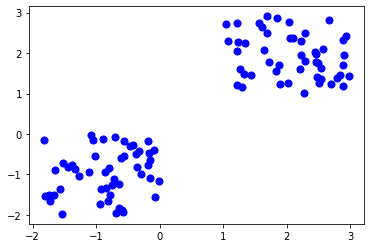

In [3]:
seed = 31 
np.random.seed(seed)
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')

## Sklearn K-Means

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
predict = kmeans.predict(X)
centroids = kmeans.cluster_centers_

print(centroids)

[[-0.83625274 -0.95829482]
 [ 2.07769536  1.92786535]]


In [22]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

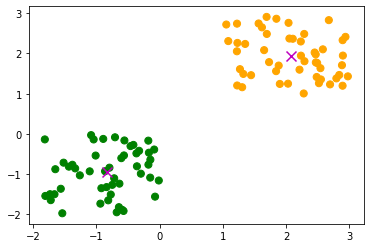

In [23]:
# procedemos a colorear los datos segun los centroides FINALES calculados por sklearn.

colors = ["g" if x == 0 else "orange" for x in predict]
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = colors)
plt.scatter(centroids[0, 0], centroids[0, 1], marker = "x", s = 100, c = "m")
plt.scatter(centroids[1, 0], centroids[1, 1], marker = "x", s = 100, c = "m")

## Generar Dataset Etiquetado.

Gracias a k-means, podemos de forma automatica, etiquetar nuestro dataset para uso futuro con algoritmos supervisados. Al proceo de convertir un dataset no-supervisado en un dataset supervisado se llama "aprendizaje semi-supervisado"

In [24]:
df = pd.DataFrame(columns=['x1','x2','y'])
df["x1"] = X[:,0]
df["x2"] = X[:,1]
df["y"] = predict

df.head()

,x1,x2,y
0,-0.572108,-1.916211,0
1,-1.540626,-1.973740,0
2,-0.416331,-0.273834,0
3,-1.816748,-0.137277,0
4,-0.150665,-1.087069,0


## Elbow Method

Esta tecnica nos permite ubicar un valor de k.
* model.intertia_: Suma de distancias cuadradas de muestras a su centroide más cercano.

In [9]:
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    distortions.append(model.inertia_)
    
print(distortions)

[481.5043737589373, 60.97902167052544, 46.4561468868733, 32.9828257775266, 26.726995940612223, 20.36358737357869, 16.920760706834415, 14.102025502252227, 12.651302327851228]


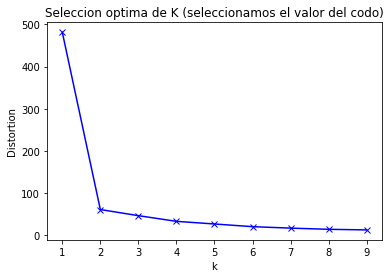

In [10]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Seleccion optima de K (seleccionamos el valor del codo)')
plt.show()